<a href="https://colab.research.google.com/github/ishaanmane/Flight-Fare-Prediction/blob/main/FLIGHT_FARE_PREDICTION_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Fare Prediction Project
1. As first step, we load our `FlightFare_Dataset` from Project Directory, using Pandas `read_excel` method
2. Then, we perform Feature Exploration and Engineering to transform our dataset
3. Once done, we use a Feature Selection technique to select the most important features
4. At this point, we train a Random Forest Regressor Model
5. As next step, we do hyper-parameter tuning (using `RandomGridSearch`) to build the best model
6. Finally, we export Model `.pkl` file back to Project Directory
7. Towards the end, we proceed to Model Deployment step

## Set up Environment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()

In [ ]:
# Mount Google Drive - applicable, if working on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set Working Directory - if working on Google Drive
%cd /content/drive/MyDrive/ML-project/flight-fare-prediction

# # Set Working Directory - if working on Local Machine
# import os
# os.chdir('/Users//replace_me')

/content/drive/MyDrive/ML-project/flight-fare-prediction


## Load Dataset

In [ ]:
# Load dataset from Project folder
dataset = pd.read_excel("Data_Train.xlsx")

# To stretch head function output to the notebook width
pd.set_option('display.max_columns', None)

dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
dataset.info()       # Print Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
dataset.shape

(10683, 11)

### Check for missing values

In [ ]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
dataset.dropna(inplace = True)

In [ ]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Pre Processing Task


In [ ]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Handling Object Data
**`Date_of_Journey`, `Dep_Time`, `Arrival_Time`, `Duration` are object datatype.** To derive numeric features on these, we use pandas `to_datetime` method to convert object data type to datetime datatype.

<span style="color: red;">Attribute `.dt.day`  will extract day from the date</span>\
<span style="color: red;">Attribute `.dt.month` will extract  month from that date</span>

In [ ]:
# Date_of_Journey is the day when plane departs.
dataset["journey_day"] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
dataset["journey_month"] = pd.to_datetime(dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time
# Extracting Hours
dataset["dep_hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour
# Extracting Minutes
dataset["dep_min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute
# Now we drop Dep_Time as it is of no use
dataset.drop(["Dep_Time"], axis = 1, inplace = True)
dataset.head()

<ipython-input-91-184d1f153345>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["dep_hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour
<ipython-input-91-184d1f153345>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["dep_min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [ ]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
dataset["arrival_hour"] = pd.to_datetime(dataset["Arrival_Time"]).dt.hour
# Extracting Minutes
dataset["arrival_min"] = pd.to_datetime(dataset["Arrival_Time"]).dt.minute
# Now we can drop Arrival_Time as it is of no use
dataset.drop(["Arrival_Time"], axis = 1, inplace = True)
dataset.head()

<ipython-input-92-192d9e1ce688>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["arrival_hour"] = pd.to_datetime(dataset["Arrival_Time"]).dt.hour
<ipython-input-92-192d9e1ce688>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["arrival_min"] = pd.to_datetime(dataset["Arrival_Time"]).dt.minute


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
#len('2h 50m'.split())

In [ ]:
# Duration is the time taken by plane to reach destination
# It is the difference betwen Arrival Time and Departure time
# Assigning and converting Duration column into list, for looping through
duration = list(dataset["Duration"])
# In table above, Row Index=2, we have Duration = 19h (missing minutes)
# Looping through all duration values
# To ensure it has both hours & mins: 'xh ym'
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
# Prepare separate duration_hours and duration_mins lists
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Add duration_hours and duration_mins list to our dataset df
dataset["Duration_hours"] = duration_hours
dataset["Duration_mins"] = duration_mins
# Drop Duration column from the dataset
dataset.drop(["Duration"], axis = 1, inplace = True)

dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data

**`Airline`, `Source`, `Destination`, `Route`, `Total_Stops`, `Additional_Info` are all categorical.** One can find many ways to handle categorical data, like:
1. <span style="color: blue;">**Nominal data**</span> --> data is not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data is in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [ ]:
# Feature engineering on: Airline
dataset["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = dataset[["Airline"]]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
  if carrier in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('Other')

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

<ipython-input-97-5653ef352d3c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline'] = pd.DataFrame(New_Airline_List)


Airline
Jet Airways          3849
IndiGo               2053
Air India            1750
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Other                  23
Name: count, dtype: int64

In [ ]:
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


In [ ]:
# Feature engineering on: Source
dataset["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [ ]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = dataset[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
# drop_first= True means we drop the first column to prevent multicollinearity
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [ ]:
# Feature engineering on: Destination
dataset["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [ ]:
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination = dataset[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

<ipython-input-102-f6df4e290dd3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['Destination'] = pd.DataFrame(New_Destination_List)


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,False,True,False,False
1,False,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False


In [ ]:
dataset["Additional_Info"].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [ ]:

# Additional_Info contains almost 80% no_info

# Route and Total_Stops are related to each other
dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
# Feature engineering on: Total_Stops
dataset["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [ ]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([dataset, Airline, Source, Destination], axis = 1) # axis = 1 signifies column
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
data_train.shape

(10682, 26)

## **Feature Selection**

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods:


1. <span style="color: purple;">**feature_importance_**</span>: To check for relative feature importance
2. <span style="color: purple;">**Variable Inflation Factor (VIF)**</span>: To check for multicollinearity

In [ ]:
#data_train.columns

In [ ]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y = data_train.iloc[:, 1]

print(X.shape, y.shape)

(10682, 25) (10682,)


### Analyse Distributions feature_importance_

In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[0.23887181 0.13828092 0.06861743 0.02932241 0.02778488 0.03578653
 0.02618664 0.15471874 0.02174214 0.00656499 0.00207059 0.0111749
 0.09841014 0.01495033 0.0243121  0.003917   0.00509337 0.00085922
 0.02222427 0.01277251 0.01666858 0.00757383 0.02638814 0.00338806
 0.00232047]


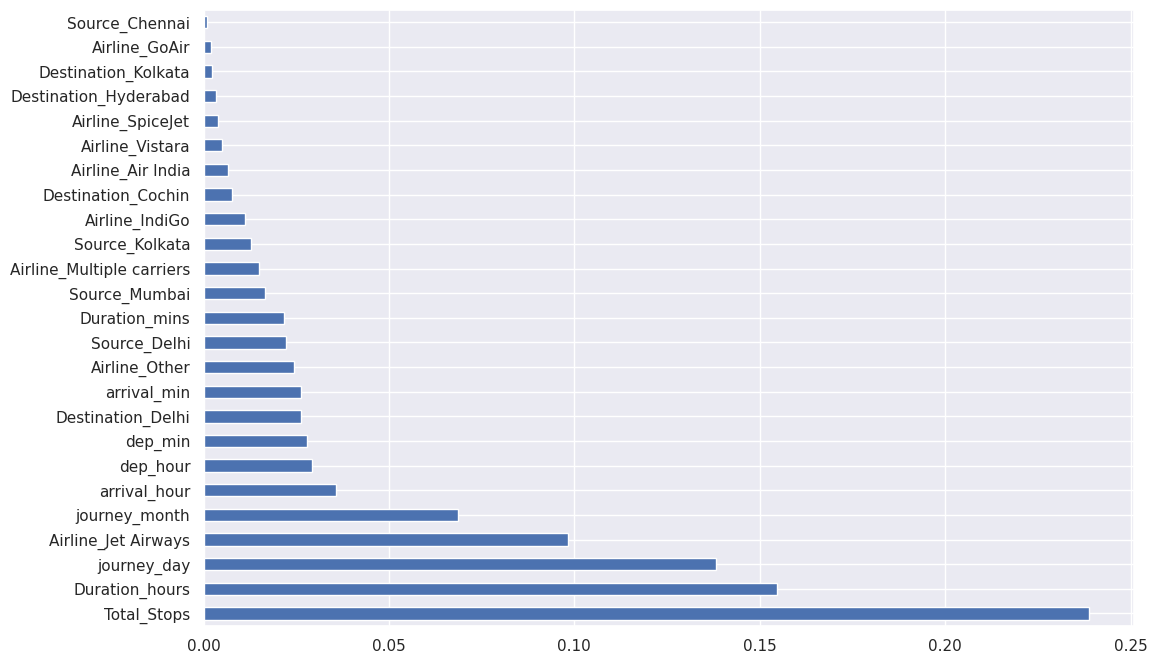

In [ ]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

### Analyse Distributions VIF - Multicollinearity

In [ ]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [ ]:
# # Compute VIF on X
# calc_vif(X)


# import pandas as pd
# import numpy as np

# # Assuming X is a DataFrame or array
# print(X.dtypes)

# # Convert non-numeric data to numeric (coercing errors to NaN)
# X = X.apply(pd.to_numeric, errors='coerce')

# # Handle missing values
# X = X.fillna(X.mean())

# # Compute VIF on cleaned X
# calc_vif(X)


In [ ]:
# Drop 'Source_Delhi'
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


# **Univariate Analysis**

In [ ]:
#univariate analysis
total_stops_counts=X['Total_Stops'].value_counts()
count_journey_days=X['journey_day'].value_counts()
count_journey_month=X['journey_month'].value_counts()
air_india_counts=X['Airline_Air India'].value_counts()
goair_counts=X['Airline_GoAir'].value_counts()
jetairways_counts=X['Airline_Jet Airways'].value_counts()
indigo_counts=X['Airline_IndiGo'].value_counts()
multi_carriers_counts=X['Airline_Multiple carriers'].value_counts()
other_airline_counts=X['Airline_Other'].value_counts()
spicejet_counts=X['Airline_SpiceJet'].value_counts()
vistara_counts=X['Airline_Vistara'].value_counts()
src_chennai=X['Source_Chennai'].value_counts()
src_kolkata=X['Source_Kolkata'].value_counts()
src_mumbai=X['Source_Mumbai'].value_counts()
des_delhi=X['Destination_Delhi'].value_counts()
des_cochin=X['Destination_Cochin'].value_counts()
des_hyderabad=X['Destination_Hyderabad'].value_counts()
des_kolkata=X['Destination_Kolkata'].value_counts()

mean_dep_hour=X['dep_hour'].mean()
mean_dep_min=X['dep_min'].mean()
mean_arrival_hour=X['arrival_hour'].mean()
mean_arrival_min=X['arrival_min'].mean()
mean_duration_hours=X['Duration_hours'].mean()
mean_duration_min=X['Duration_mins'].mean()

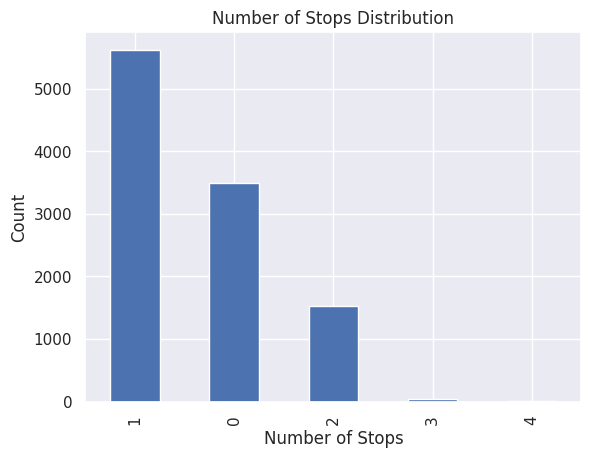

In [ ]:
import matplotlib.pyplot as plt

total_stops_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Number of Stops')
plt.ylabel('Count')
plt.title('Number of Stops Distribution')

# Displaying the plot
plt.show()

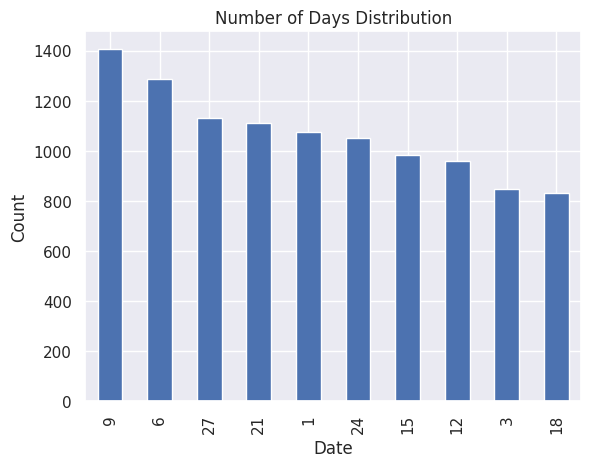

In [ ]:
count_journey_days.plot(kind='bar')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Days Distribution')

# Displaying the plot
plt.show()

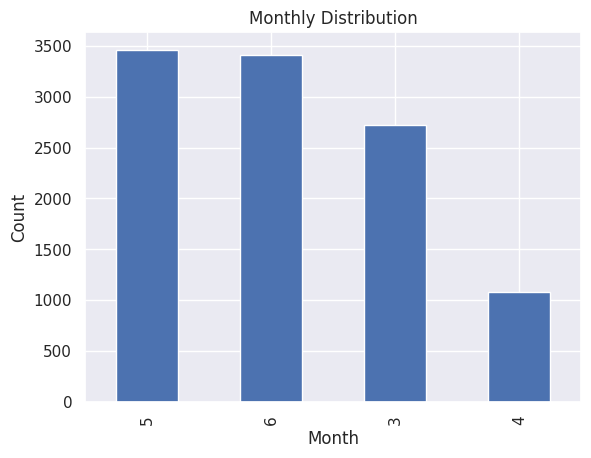

In [ ]:
count_journey_month.plot(kind='bar')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Distribution')

# Displaying the plot
plt.show()

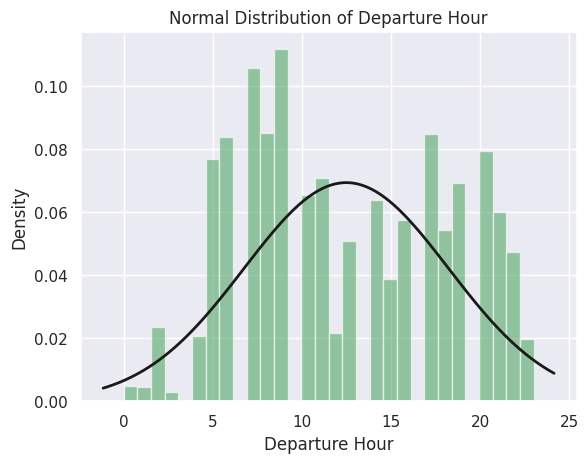

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'dep_hour' is the name of the column
dep_hour_values = X['dep_hour']

# Fit a normal distribution to the data
mu, std = norm.fit(dep_hour_values)

# Plot the histogram
plt.hist(dep_hour_values, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF (Probability Density Function)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Adding labels and title
plt.xlabel('Departure Hour')
plt.ylabel('Density')
plt.title('Normal Distribution of Departure Hour')

# Show the plot
plt.show()


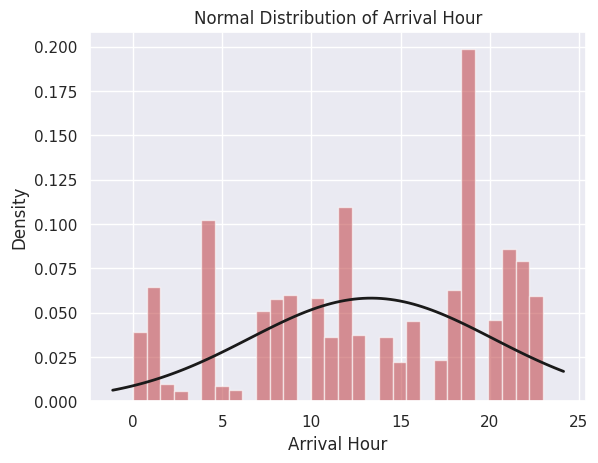

In [ ]:
# Assuming 'dep_hour' is the name of the column
arrival_hour_values = X['arrival_hour']

# Fit a normal distribution to the data
mu, std = norm.fit(arrival_hour_values)

# Plot the histogram
plt.hist(arrival_hour_values, bins=30, density=True, alpha=0.6, color='r')

# Plot the PDF (Probability Density Function)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Adding labels and title
plt.xlabel('Arrival Hour')
plt.ylabel('Density')
plt.title('Normal Distribution of Arrival Hour')

# Show the plot
plt.show()


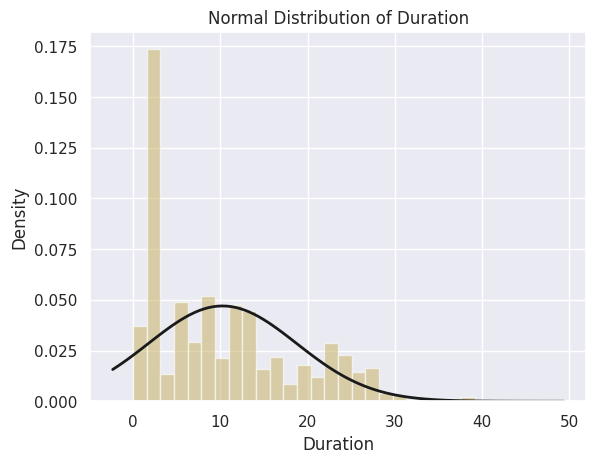

In [ ]:
# Assuming 'dep_hour' is the name of the column
dur_hour_values = X['Duration_hours']

# Fit a normal distribution to the data
mu, std = norm.fit(dur_hour_values)

# Plot the histogram
plt.hist(dur_hour_values, bins=30, density=True, alpha=0.6, color='y')

# Plot the PDF (Probability Density Function)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Adding labels and title
plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Normal Distribution of Duration')

# Show the plot
plt.show()


# **Multivariate Analysis**

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create pairplot
# pairplot = sns.pairplot(X)
# plt.savefig('pairplot.png')  # Save the image as 'pairplot.png'
# plt.show()

# **OUTLIER DETECTION**

In [ ]:
X.columns

Index(['Total_Stops', 'journey_day', 'journey_month', 'dep_hour', 'dep_min',
       'arrival_hour', 'arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

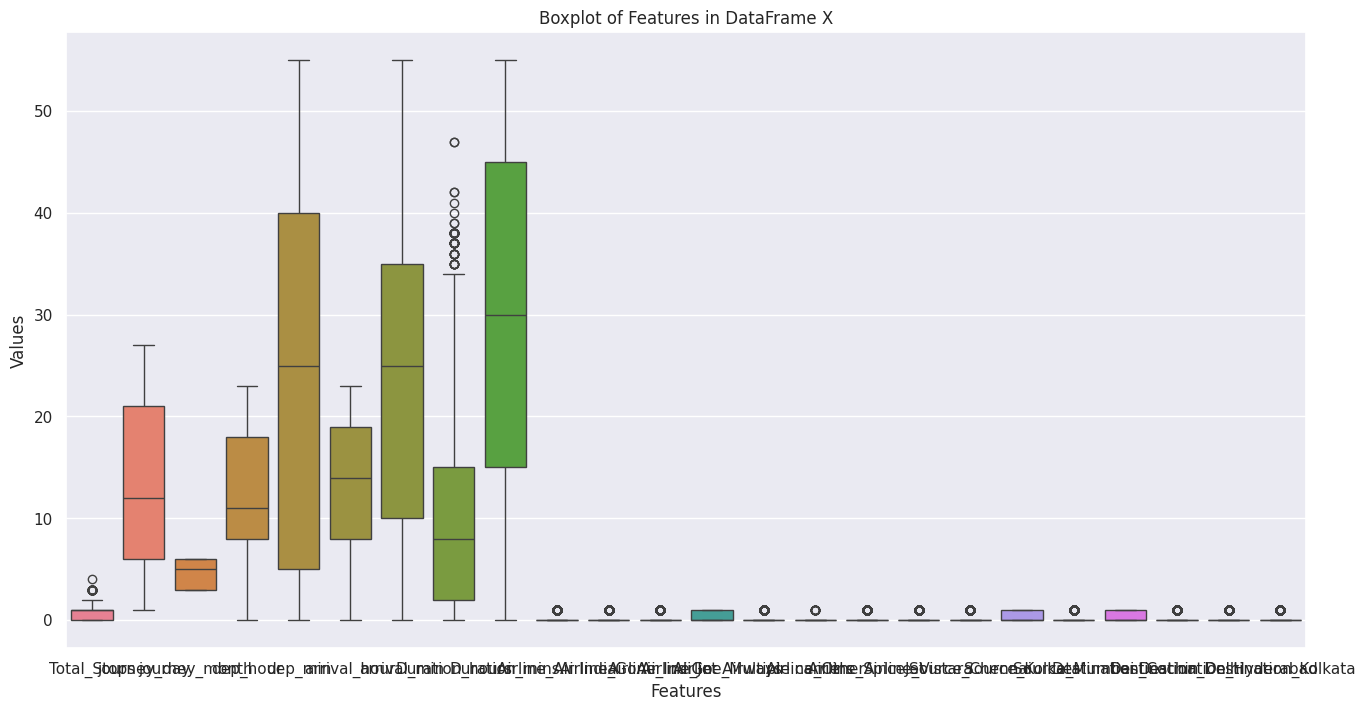

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your DataFrame X
# Convert object data types to numeric, coerce invalid parsing to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Dropping columns with non-numeric data if needed (optional)
# X = X.select_dtypes(include=[np.number])

# Plotting boxplot for each numeric column
plt.figure(figsize=(16, 8))
sns.boxplot(data=X)
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Features in DataFrame X")

# Show the plot
plt.show()


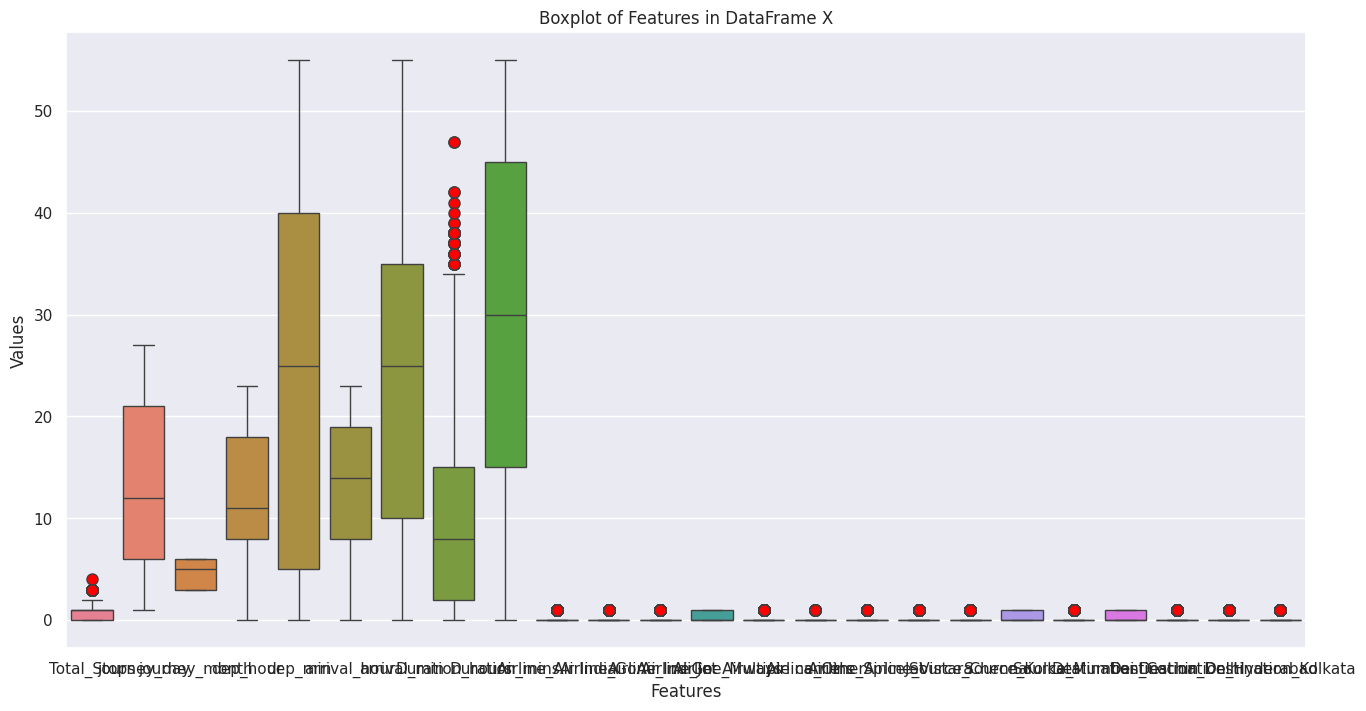

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data: Assuming you have a DataFrame X with the specified columns
# Convert all columns to numeric data types, coercing invalid parsing to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Create a boxplot with seaborn
plt.figure(figsize=(16, 8))

# Customize the appearance of outliers using flierprops
flierprops = {
    'marker': 'o',     # Set the marker type (e.g., 'o' for circle)
    'markersize': 8,   # Set the size of the marker
    'markerfacecolor': 'red',  # Set the marker face color to red
    'linestyle': 'none' # No lines for the markers
}

# Plot the boxplot
sns.boxplot(data=X, flierprops=flierprops)

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Features in DataFrame X")

# Show the plot
plt.show()


# **ANALYSE CORRELATIONS**

In [ ]:
# Data Train Columns: 'Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
#        'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
#        'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
#        'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
#        'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
#        'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
#        'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'

Z = data_train.copy()




In [ ]:
Z.drop(['dep_hour', 'dep_min', 'arrival_hour','arrival_min'], axis=1, inplace=True)
Z.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Other', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [ ]:
Z['Duration_time'] = Z['Duration_hours'] * 60 + Z['Duration_mins']
Z.drop(['Duration_hours','Duration_mins'], axis=1, inplace=True)
display(Z.head())

,Total_Stops,Price,journey_day,journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Duration_time
0,0,3897,24,3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,170
1,2,7662,1,5,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,445
2,2,13882,9,6,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,1140
3,1,6218,12,5,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,325
4,1,13302,1,3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,285


<Axes: title={'center': 'Price'}>

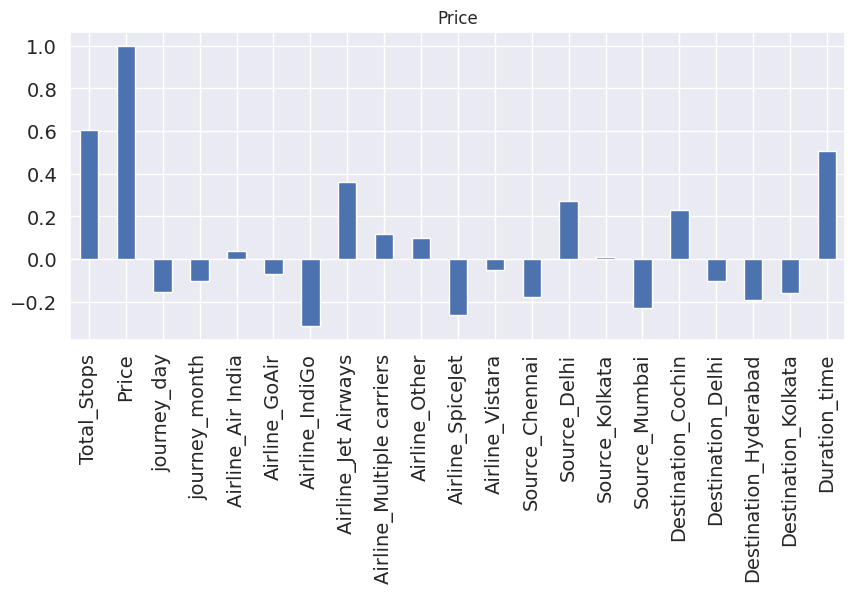

In [ ]:
Z.corr().loc['Price'].plot(kind= 'bar', figsize=(10,4), grid=True, fontsize=14,title='Price' )

In [ ]:
Z.drop(['Airline_Air India','Airline_GoAir', 'Airline_Multiple carriers', 'Airline_Other','Airline_Vistara', 'Source_Chennai','Source_Kolkata',
        'Destination_Delhi', 'Destination_Kolkata' ], axis=1, inplace=True)
display(Z.head())

,Total_Stops,Price,journey_day,journey_month,Airline_IndiGo,Airline_Jet Airways,Airline_SpiceJet,Source_Delhi,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Duration_time
0,0,3897,24,3,True,False,False,False,False,False,False,170
1,2,7662,1,5,False,False,False,False,False,False,False,445
2,2,13882,9,6,False,True,False,True,False,True,False,1140
3,1,6218,12,5,True,False,False,False,False,False,False,325
4,1,13302,1,3,True,False,False,False,False,False,False,285


<Axes: title={'center': 'Price'}>

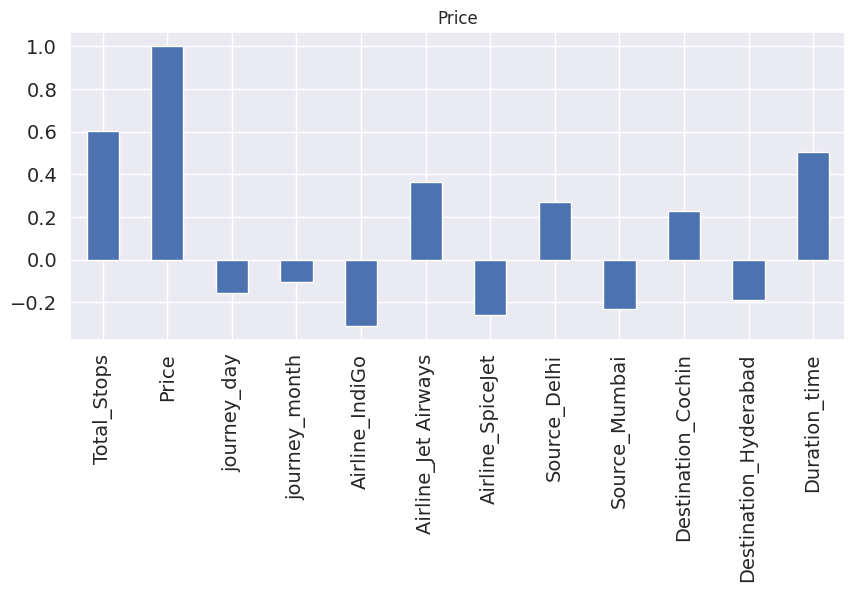

In [ ]:
Z.corr().loc['Price'].plot(kind= 'bar', figsize=(10,4), grid=True, fontsize=14,title='Price' )

<Axes: title={'center': 'Price'}>

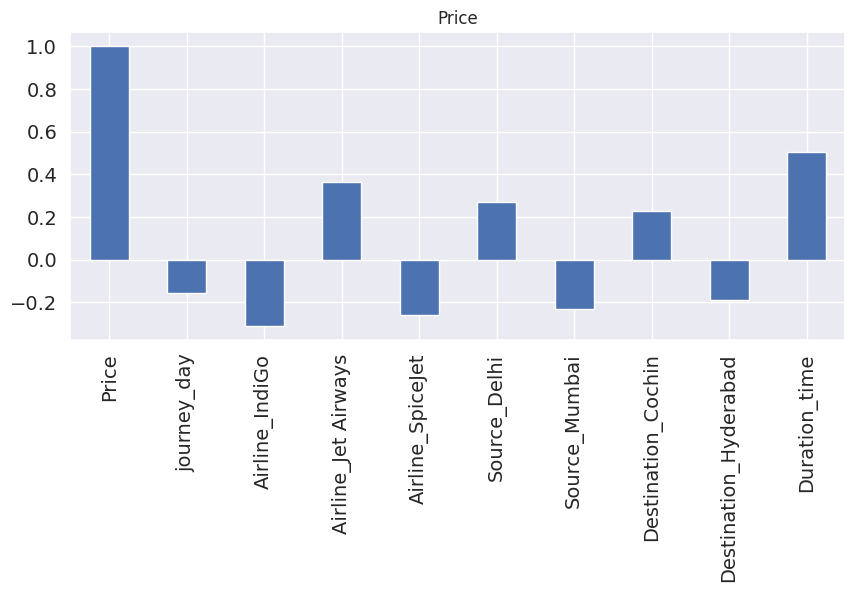

In [ ]:
Z.drop(['journey_month', 'Total_Stops'], axis=1, inplace=True)
Z.corr().loc['Price'].plot(kind= 'bar', figsize=(10,4), grid=True, fontsize=14,title='Price' )


<Axes: title={'center': 'Price'}>

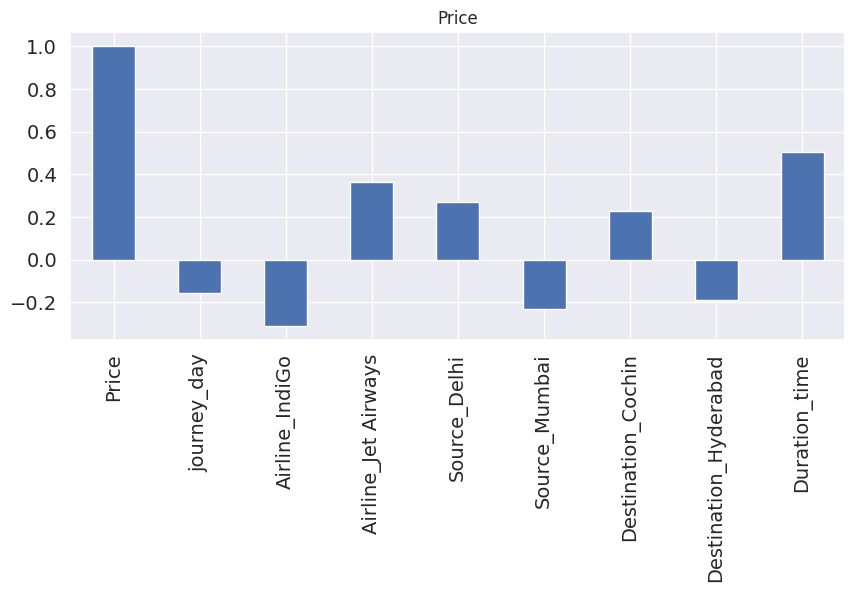

In [ ]:
Z.drop(['Airline_SpiceJet'], axis=1, inplace=True)
Z.corr().loc['Price'].plot(kind= 'bar', figsize=(10,4), grid=True, fontsize=14,title='Price' )

In [ ]:
display(Z.columns)
display(Z.shape)
Z.head()

Index(['Price', 'journey_day', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Source_Delhi', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Hyderabad', 'Duration_time'],
      dtype='object')

(10682, 9)

,Price,journey_day,Airline_IndiGo,Airline_Jet Airways,Source_Delhi,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Duration_time
0,3897,24,True,False,False,False,False,False,170
1,7662,1,False,False,False,False,False,False,445
2,13882,9,False,True,True,False,True,False,1140
3,6218,12,True,False,False,False,False,False,325
4,13302,1,True,False,False,False,False,False,285


In [ ]:
train_df=Z.copy()

#**Dimensionality Reduction Using PCA**

## **Using 3 PCS**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

train_df=Z.copy()

# Separate features (X) and target variable (y) from train_df
X = train_df.drop('Price', axis=1)  # Features
y = train_df['Price']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=3)  # Reduce to 3 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Now you have X_train_pca, X_test_pca, y_train, and y_test ready for training and testing your model
# You can use X_train_pca and y_train for training your model and X_test_pca, y_test for evaluating its performance


### **Using LR** ###

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize Linear Regression model
linear_reg = LinearRegression()

# Train the model on the PCA-transformed training data
linear_reg.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = linear_reg.predict(X_test_pca)

# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)  # calculating RMSE from MSE
lr_mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("Mean Absolute Error (MAE):", lr_mae)


Mean Squared Error (MSE): 13649027.132757816
Root Mean Squared Error (RMSE): 3694.458977002968
Mean Absolute Error (MAE): 2608.3320743232753


### **Using Random Forests as the Training Algorithm**

#### **Training Model with MSE as an error metric**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=None)

# Train the model on the PCA-transformed training data
rf_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = rf_regressor.predict(X_test_pca)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", rf_mse)

Mean Squared Error: 10816875.291248582


#### **Training Model with RMSE as an Error Metric**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the PCA-transformed training data
rf_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = rf_regressor.predict(X_test_pca)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rf_rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rf_rmse)


Root Mean Squared Error: 3285.5765015593643


#### **Using MAE as an error metric**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the PCA-transformed training data
rf_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = rf_regressor.predict(X_test_pca)

# Calculate MAE
rf_mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", rf_mae)

Mean Absolute Error: 2254.4253580850764


### **Using KNN as the training algorithm** ###

#### **Using MSE as an error metric**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model on the PCA-transformed training data
knn_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = knn_regressor.predict(X_test_pca)

# Evaluate the model
knn_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", knn_mse)


Mean Squared Error: 10296472.20565014


#### **Using RMSE as an error metric** ####


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model on the PCA-transformed training data
knn_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = knn_regressor.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
knn_rmse=np.sqrt(mse)
print("Root Mean Squared Error:", knn_rmse)


Root Mean Squared Error: 3208.8116500739243


#### **Using MAE as an EM** ####

In [ ]:
# Calculate MAE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model on the PCA-transformed training data
knn_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = knn_regressor.predict(X_test_pca)
knn_mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", knn_mae)

Mean Absolute Error: 2212.7521047708137


### **Using SVR as the Training Algorithm** ###

#### **Using MSE as an EM** ####

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize SVR with linear kernel
svr_regressor = SVR(kernel='linear')

# Train the model on the PCA-transformed training data
svr_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = svr_regressor.predict(X_test_pca)

# Evaluate the model
svr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", svr_mse)


Mean Squared Error: 14477047.464342592


#### **Using RMSE as an EM** ####

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize SVR with linear kernel
svr_regressor = SVR(kernel='linear')

# Train the model on the PCA-transformed training data
svr_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = svr_regressor.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
svr_rmse=np.sqrt(mse)
print("Mean Squared Error:", svr_rmse)


Mean Squared Error: 3804.8715437373958


#### **Using MAE as an EM** ####

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Initialize SVR with linear kernel
svr_regressor = SVR(kernel='linear')

# Train the model on the PCA-transformed training data
svr_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = svr_regressor.predict(X_test_pca)

svr_mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", svr_mae)

Mean Absolute Error: 2606.240796994359


### **Analysing the Error Metrics** ###

In [ ]:
# Create a dictionary with the values
em_data = {
    'Model': ['KNN', 'SVR', 'Random Forest', 'Linear Regression'],
    'MSE': [knn_mse, svr_mse, rf_mse,lr_mse],
    'RMSE': [knn_rmse, svr_rmse, rf_rmse, lr_rmse],
    'MAE': [knn_mae, svr_mae, rf_mae, lr_mae]
}

# Create a DataFrame
em_df = pd.DataFrame(em_data)

# Set 'Model' column as index
em_df.set_index('Model', inplace=True)

# Display the DataFrame
display(em_df)

,MSE,RMSE,MAE
Model,,,
KNN,1.029647e+07,3208.811650,2212.752105
SVR,1.447705e+07,3804.871544,2606.240797
Random Forest,1.081688e+07,3285.576502,2254.425358
Linear Regression,1.364903e+07,3694.458977,2608.332074


Since KNN has the least RMSE value we will choose KNN

### **Visualising the Algorithm** ###

#### **Scatter Plot** ####

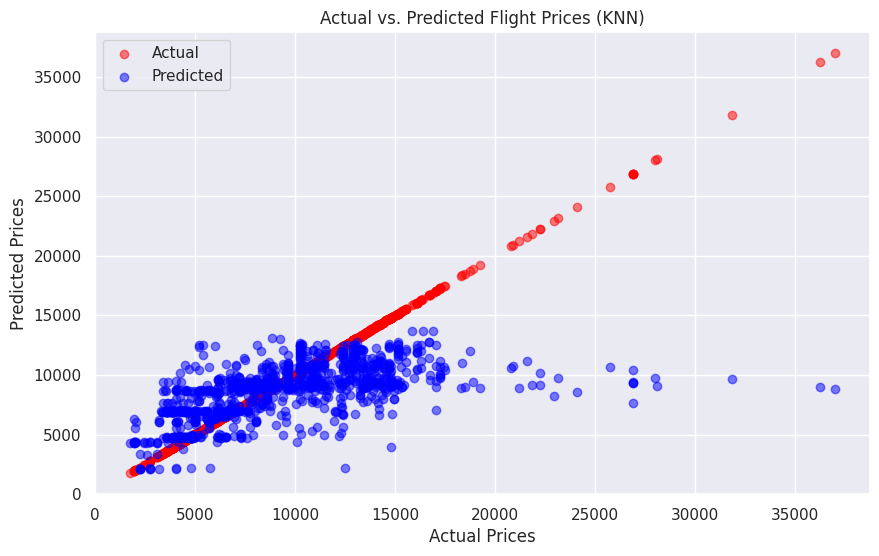

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot for actual vs. predicted flight prices
plt.figure(figsize=(10, 6))

# Plot actual prices in red
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)

# Plot predicted prices in blue
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.5)

# Add labels and title
plt.title('Actual vs. Predicted Flight Prices (KNN)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

#### **Residual Plot** ####

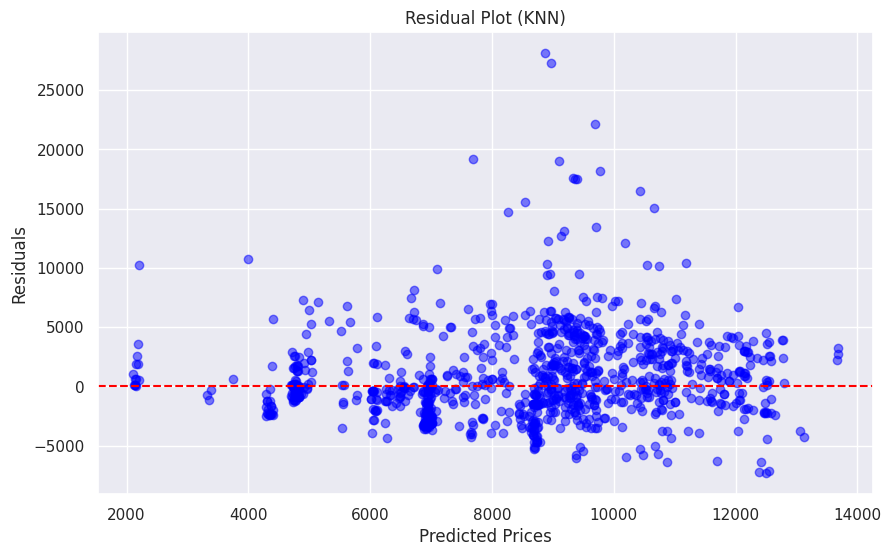

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (KNN)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()


#### **Actual vs Predicted Line Plot** ####

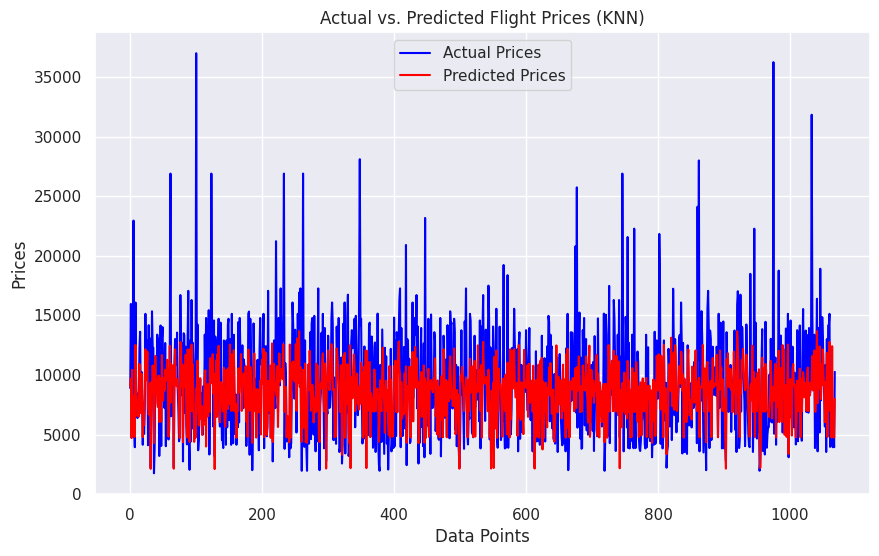

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot of actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted Prices')
plt.title('Actual vs. Predicted Flight Prices (KNN)')
plt.xlabel('Data Points')
plt.ylabel('Prices')
plt.legend()
plt.show()

# **Interpretting the model**

In [ ]:
pip install numpy pandas scikit-learn shap


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import shap


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model on the PCA-transformed training data
knn_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = knn_regressor.predict(X_test_pca)


In [ ]:
display("Xtrain: ",X_train_pca.shape)
display("ytrain: ",y_train.shape)
display("ypred",y_pred.shape)
display("xtest",X_test_pca.shape)



'Xtrain: '

(9613, 3)

'ytrain: '

(9613,)

'ypred'

(1069,)

'xtest'

(1069, 3)

Feature Importance: [0.45785121 0.37731297 0.16483582]


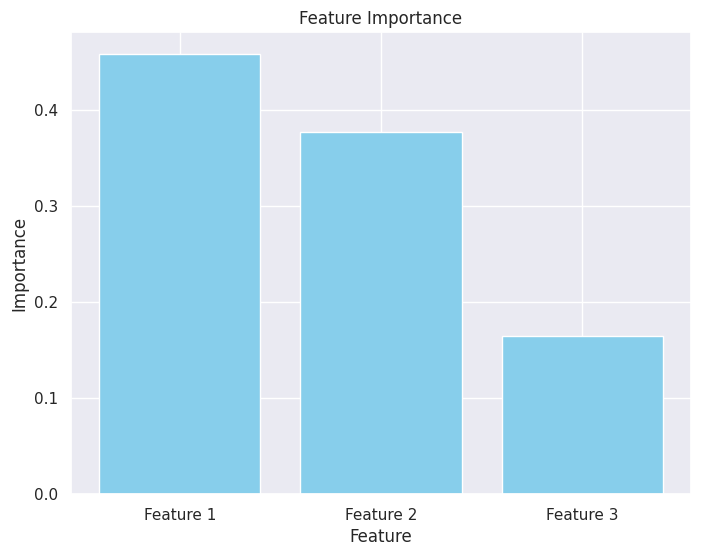

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model on the PCA-transformed training data
knn_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = knn_regressor.predict(X_test_pca)

# Calculate the mean squared error (MSE)
mse_original = mean_squared_error(y_test, y_pred)

# Number of features
n_features = X_train_pca.shape[1]

# Initialize array to store feature importance
feature_importance = np.zeros(n_features)

# Permute the values of each feature one by one and calculate the mean squared error
for i in range(n_features):
    X_test_pca_permuted = X_test_pca.copy()
    np.random.shuffle(X_test_pca_permuted[:, i])  # Permute the ith feature
    y_pred_permuted = knn_regressor.predict(X_test_pca_permuted)
    mse_permuted = mean_squared_error(y_test, y_pred_permuted)
    feature_importance[i] = mse_original - mse_permuted

# Normalize feature importance
feature_importance /= np.sum(feature_importance)
print("Feature Importance:", feature_importance)

# Feature names
feature_names = ['Feature 1', 'Feature 2', 'Feature 3']

# Create bar graph
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importance, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [ ]:
import shap
import pandas as pd

# Convert X_test_pca to a pandas DataFrame
X_test_pca_df = pd.DataFrame(X_test_pca, columns=['Feature 1', 'Feature 2', 'Feature 3'])

# Explain the model's predictions using SHAP values
explainer = shap.KernelExplainer(knn_regressor.predict, X_train_pca)
shap_values = explainer.shap_values(X_test_pca)

# Visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_pca_df.iloc[0,:])

  0%|          | 0/1069 [00:00<?, ?it/s]

In [ ]:
# Visualize the first prediction's explanation and save it as an HTML file
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_pca_df.iloc[0,:])
shap.save_html("shap_plot.html", shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_pca_df.iloc[0,:]))